[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kainat5008/Gradient-Descent-for-Linear-Regression/blob/main/Assignment2.ipynb)

Final parameters (SGD): w = 1.9778070074542973, b = 0.09409501919177997


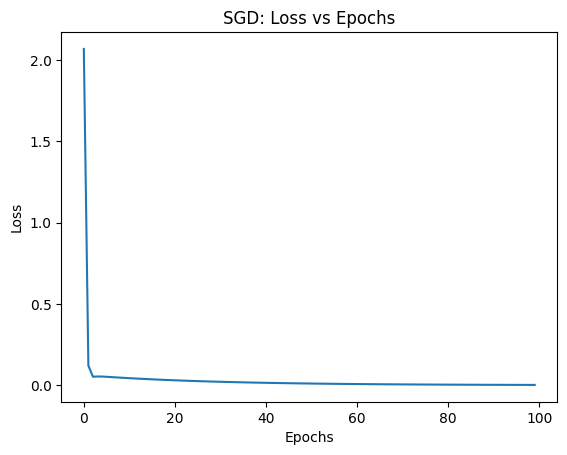

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a small dataset
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Initialize parameters
w, b = 0, 0

# Hyperparameters
learning_rate = 0.01
epochs = 100

# SGD function
def sgd(x, y, w, b, learning_rate, epochs):
    history = []  # To store loss values
    for epoch in range(epochs):
        for i in range(len(x)):
            # Compute gradients
            y_pred = w * x[i] + b
            dw = -2 * x[i] * (y[i] - y_pred)
            db = -2 * (y[i] - y_pred)
            # Update parameters
            w = w - learning_rate * dw
            b = b - learning_rate * db
        # Compute loss for the epoch
        loss = np.mean((y - (w * x + b)) ** 2)
        history.append(loss)
    return w, b, history

# Train the model
w_final, b_final, loss_history = sgd(x, y, w, b, learning_rate, epochs)
print(f"Final parameters (SGD): w = {w_final}, b = {b_final}")

# Plot loss over epochs
plt.plot(loss_history)
plt.title("SGD: Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Final parameters (Batch GD): w = 1.8984326022295357, b = 0.36669053309859806


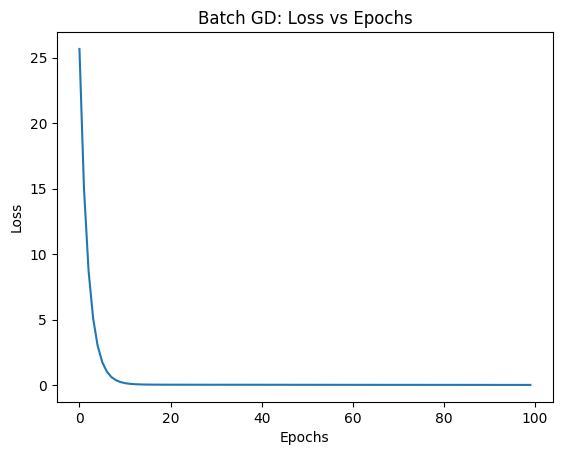

In [2]:
# Batch Gradient Descent function
def batch_gradient_descent(x, y, w, b, learning_rate, epochs):
    history = []  # To store loss values
    for epoch in range(epochs):
        # Compute gradients for the entire dataset
        y_pred = w * x + b
        dw = -2 * np.mean(x * (y - y_pred))
        db = -2 * np.mean(y - y_pred)
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        # Compute loss for the epoch
        loss = np.mean((y - (w * x + b)) ** 2)
        history.append(loss)
    return w, b, history

# Train the model
w_final, b_final, loss_history = batch_gradient_descent(x, y, w, b, learning_rate, epochs)
print(f"Final parameters (Batch GD): w = {w_final}, b = {b_final}")

# Plot loss over epochs
plt.plot(loss_history)
plt.title("Batch GD: Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Final parameters (Mini-Batch GD): w = 1.9493460930175142, b = 0.17536624456082386


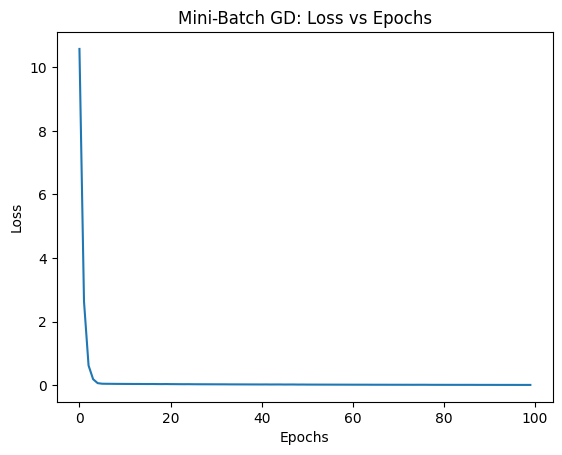

In [3]:
# Mini-Batch Gradient Descent function
def mini_batch_gradient_descent(x, y, w, b, learning_rate, epochs, batch_size):
    history = []  # To store loss values
    n = len(x)
    for epoch in range(epochs):
        # Shuffle the data
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]
        for i in range(0, n, batch_size):
            # Get the mini-batch
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            # Compute gradients for the mini-batch
            y_pred = w * x_batch + b
            dw = -2 * np.mean(x_batch * (y_batch - y_pred))
            db = -2 * np.mean(y_batch - y_pred)
            # Update parameters
            w = w - learning_rate * dw
            b = b - learning_rate * db
        # Compute loss for the epoch
        loss = np.mean((y - (w * x + b)) ** 2)
        history.append(loss)
    return w, b, history

# Train the model
batch_size = 2
w_final, b_final, loss_history = mini_batch_gradient_descent(x, y, w, b, learning_rate, epochs, batch_size)
print(f"Final parameters (Mini-Batch GD): w = {w_final}, b = {b_final}")

# Plot loss over epochs
plt.plot(loss_history)
plt.title("Mini-Batch GD: Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

SGD: w = 1.9778070074542973, b = 0.09409501919177997
Batch GD: w = 1.8984326022295357, b = 0.36669053309859806
Mini-Batch GD: w = 1.9570793953019308, b = 0.16975315832301763


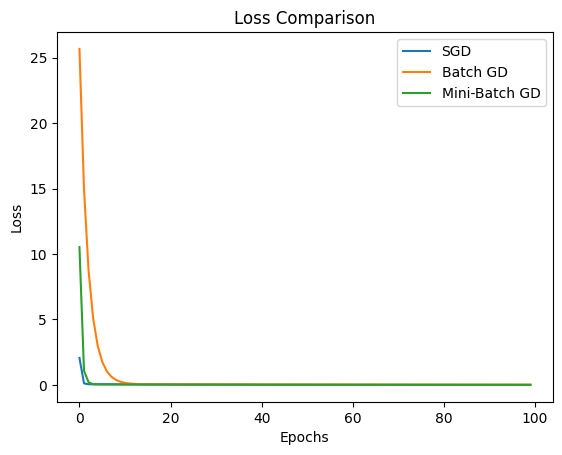

In [4]:
# Compare all three methods
w_sgd, b_sgd, loss_sgd = sgd(x, y, w, b, learning_rate, epochs)
w_batch, b_batch, loss_batch = batch_gradient_descent(x, y, w, b, learning_rate, epochs)
w_mini, b_mini, loss_mini = mini_batch_gradient_descent(x, y, w, b, learning_rate, epochs, batch_size)

# Print final parameters
print(f"SGD: w = {w_sgd}, b = {b_sgd}")
print(f"Batch GD: w = {w_batch}, b = {b_batch}")
print(f"Mini-Batch GD: w = {w_mini}, b = {b_mini}")

# Plot loss comparison
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_batch, label="Batch GD")
plt.plot(loss_mini, label="Mini-Batch GD")
plt.title("Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Final parameters (SGD with Momentum): w = 1.9725000875318148, b = 0.09999473058818174


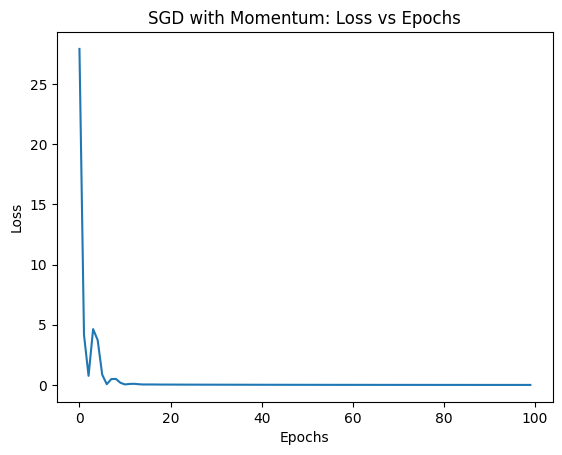

In [5]:
# SGD with Momentum
def sgd_momentum(x, y, w, b, learning_rate, epochs, beta):
    history = []  # To store loss values
    v_w, v_b = 0, 0  # Initialize momentum terms
    for epoch in range(epochs):
        for i in range(len(x)):
            # Compute gradients
            y_pred = w * x[i] + b
            dw = -2 * x[i] * (y[i] - y_pred)
            db = -2 * (y[i] - y_pred)
            # Update momentum terms
            v_w = beta * v_w + (1 - beta) * dw
            v_b = beta * v_b + (1 - beta) * db
            # Update parameters
            w = w - learning_rate * v_w
            b = b - learning_rate * v_b
        # Compute loss for the epoch
        loss = np.mean((y - (w * x + b)) ** 2)
        history.append(loss)
    return w, b, history

# Train with momentum
beta = 0.9  # Momentum term
w_final, b_final, loss_history = sgd_momentum(x, y, w, b, learning_rate, epochs, beta)
print(f"Final parameters (SGD with Momentum): w = {w_final}, b = {b_final}")

# Plot loss over epochs
plt.plot(loss_history)
plt.title("SGD with Momentum: Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()